In [35]:
import numpy as np
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import HTML
from scipy.stats import ttest_rel

In [2]:
with open('wingspan_tournaments.json', 'r') as f:
    tourneys = json.load(f)

In [32]:
premier_leagues = list(sorted(
    [t for t in tourneys if 'Premier' in t['name']],
    key=lambda t: (
        t['name'].replace('Wingspan ', '').split('D')[0],
        -1*int(t['name'].split(' Div ')[1])),
    reverse=True
))
[t['name'] for t in premier_leagues]

['Premier League IV Div 1',
 'Premier League IV Div 2',
 'Premier League IV Div 3',
 'Premier League IV Div 4',
 'Premier League IV Div 5',
 'Premier League IV Div 6',
 'Wingspan Premier League III - Div 1',
 'Wingspan Premier League III - Div 2',
 'Wingspan Premier League III - Div 3',
 'Wingspan Premier League III - Div 4',
 'Wingspan Premier League II - Div 1',
 'Wingspan Premier League II - Div 2']

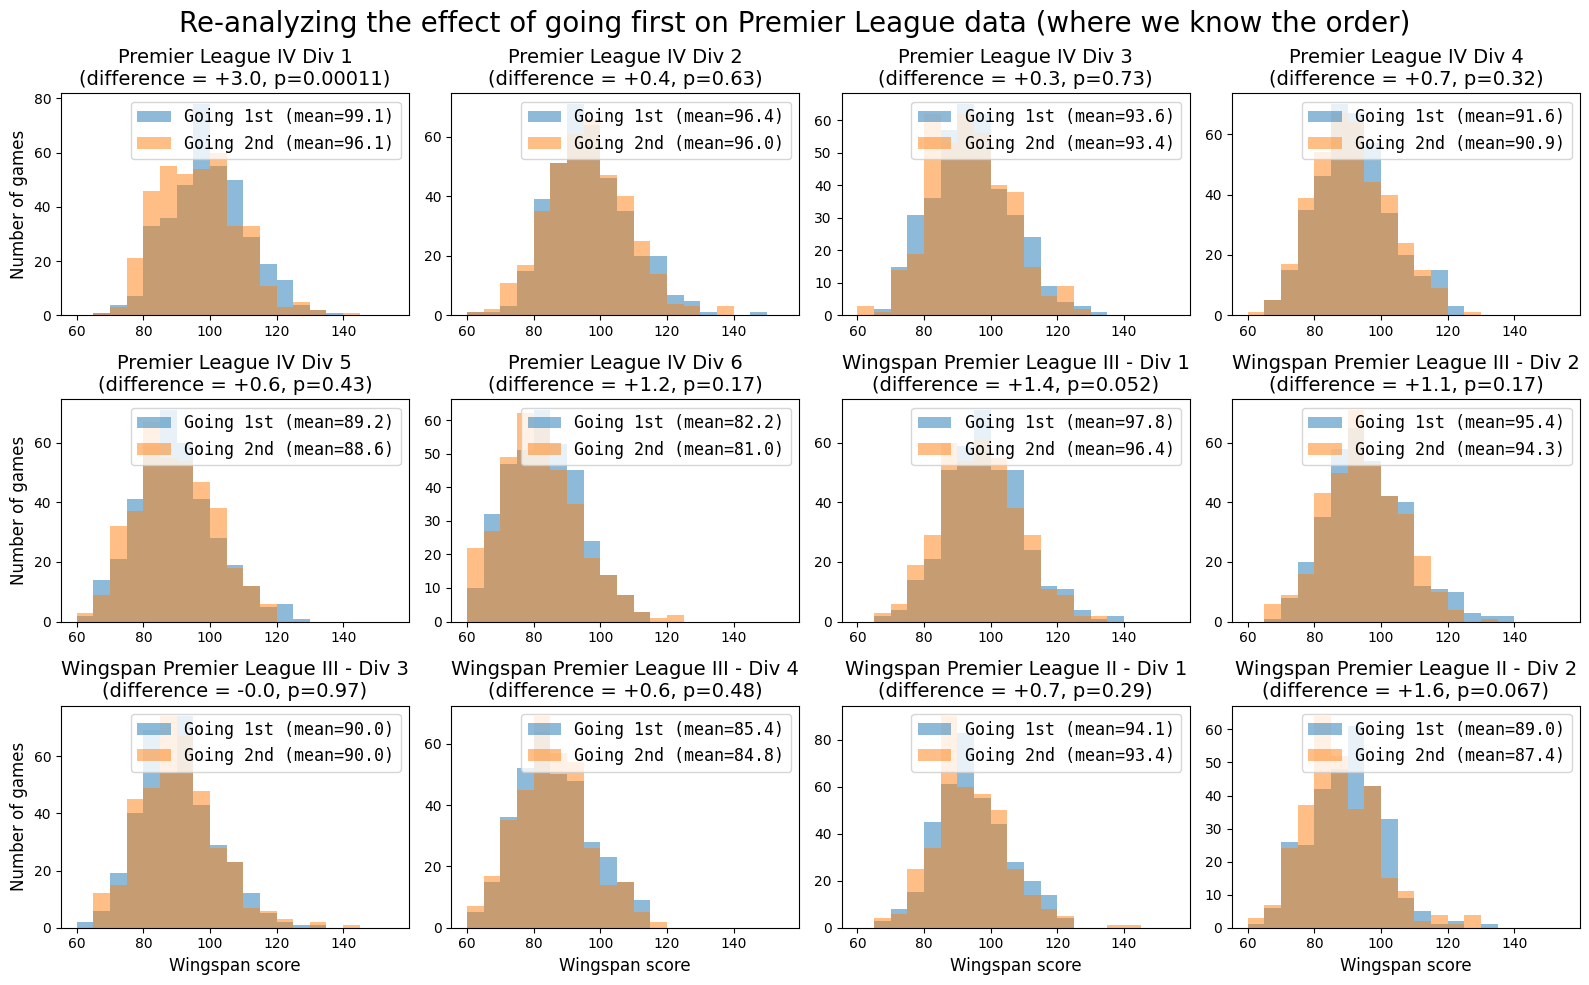

In [66]:
def histplot(arr,label):
    plt.hist(arr, label=f"{label} (mean={np.mean(arr):.1f})", alpha=0.5, bins=np.arange(60,160,5))
    
fig = plt.figure(figsize=(16,10))
fig.suptitle("Re-analyzing the effect of going first on Premier League data (where we know the order)", fontsize=20)
for j, t in enumerate(premier_leagues):
    plt.subplot(3,4,j+1)
    scores = [[], []]
    for s in t['scores']:
        for i, (user, score) in enumerate(s.items()):
            scores[i].append(score)
    
    histplot(scores[0], 'Going 1st')
    histplot(scores[1], 'Going 2nd')

    pvalue = ttest_rel(*scores).pvalue
    pvalue = round(pvalue, int(np.ceil(-np.log10(pvalue)))+1)
    leg = plt.legend(fontsize=12)
    plt.setp(leg.texts, family='monospace')
    plt.title(f"{t['name']}\n(difference = {np.mean(scores[0]) - np.mean(scores[1]):+.1f}, p={pvalue})",
             fontsize=14)
    if j >= 8:
        plt.xlabel("Wingspan score", fontsize=12)
    if j % 4 == 0:
        plt.ylabel("Number of games", fontsize=12)
plt.tight_layout()
plt.show()